# Exploratory Data Analysis (EDA) – Telecom Customer Churn

This notebook focuses on exploring customer behavior patterns
and identifying key factors associated with customer churn.

The analysis is guided by business questions, not random visualization.

### Installing Packages

In [26]:
#installing Packages
!pip install seaborn
!pip install matplotlib
!pip install tabulate

### Importing Libraries

In [27]:
#import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loadind dataset

In [28]:
# Load raw churn dataset
#data_path = "../data/raw/customer_churn.csv"
data = "..\\data\\raw\\WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(data)


In [29]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

C:\Users\shant\AppData\Local\Temp\ipykernel_27500\870435351.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x = df['Churn'], palette= 'Set2')


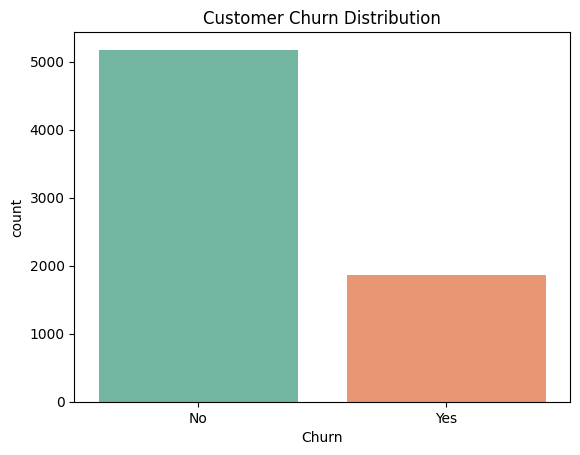

In [30]:
#Visualize the Churn
sns.countplot(data=df, x = df['Churn'], palette= 'Set2')
plt.title("Customer Churn Distribution")
plt.savefig(r"..\outputs\figures\figure_churn_distribution.png",dpi=300,bbox_inches="tight")
plt.show()
plt.close()

# 73% will has not Churn and remaining 26 has Churned

### Boxplot Based on tenure Vs Churn

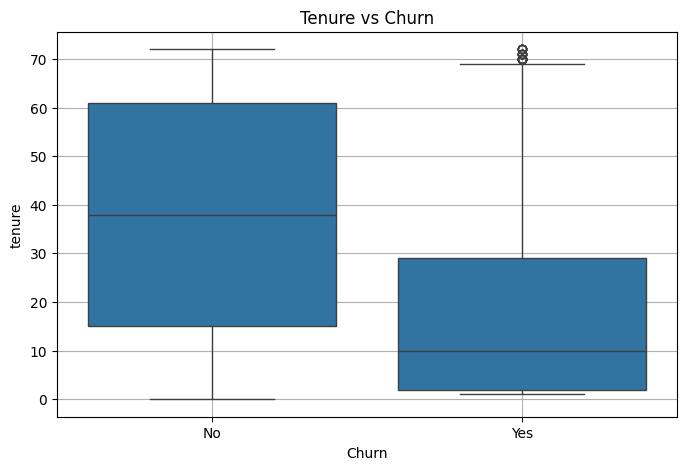

In [31]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Churn',y = 'tenure')
plt.title("Tenure vs Churn")
plt.grid()
plt.savefig(r"..\outputs\figures\Tenure_vs_Churn.png",dpi=300,bbox_inches="tight")
plt.show()
plt.show()

#low tenure leads to More Churn
#there is High Risk that People Would Churn During Intial tenure Period 

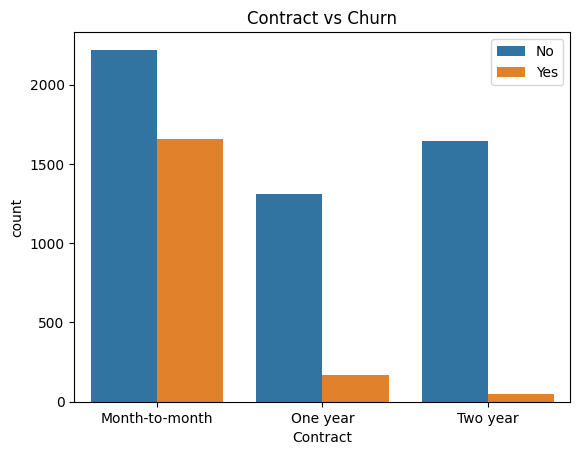

In [32]:
sns.countplot(data=df, x = 'Contract', hue = 'Churn')
plt.title("Contract vs Churn")
plt.legend()
plt.savefig(r"..\outputs\figures\Contract_vs_Churn.png",dpi=300,bbox_inches="tight")
plt.show()
plt.close()
#Business insight:
#Month-to-month contracts churn the most
#Long-term contracts reduce churn risk

C:\Users\shant\AppData\Local\Temp\ipykernel_27500\1051754654.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


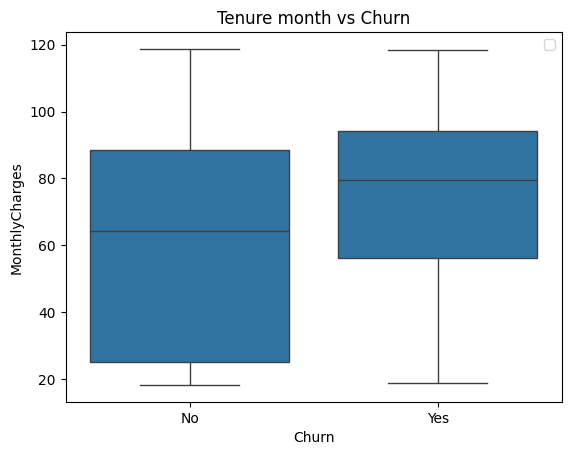

In [33]:
sns.boxplot(data=df, x = 'Churn', y = 'MonthlyCharges')
plt.title("Tenure month vs Churn")
plt.legend()
plt.savefig(r"..\outputs\figures\TenureMonth_vs_Churn.png",dpi=300,bbox_inches="tight")
plt.show()
plt.close()

#Interpretation:
#High monthly charges increase churn risk
#Price sensitivity is a major factor

In [34]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

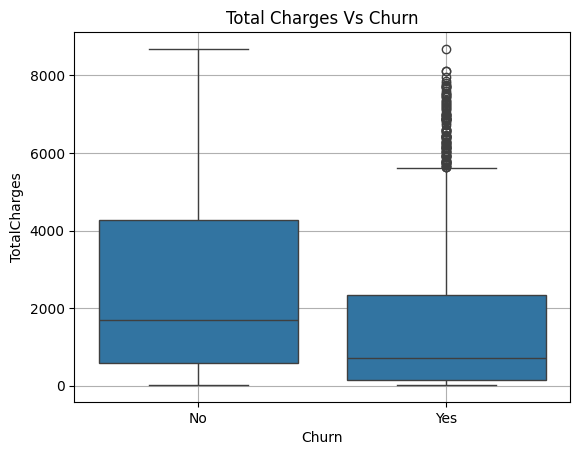

In [35]:
sns.boxplot(data=df, x = 'Churn', y = 'TotalCharges')
plt.title("Total Charges Vs Churn")
plt.grid()
plt.savefig(r"..\outputs\figures\TotalCharges_vs_Churn.png",dpi=300,bbox_inches="tight")
plt.show()
plt.close()

#The One Who had Paid More Charges will not churn
#Low Life time Value Customer will Churn More

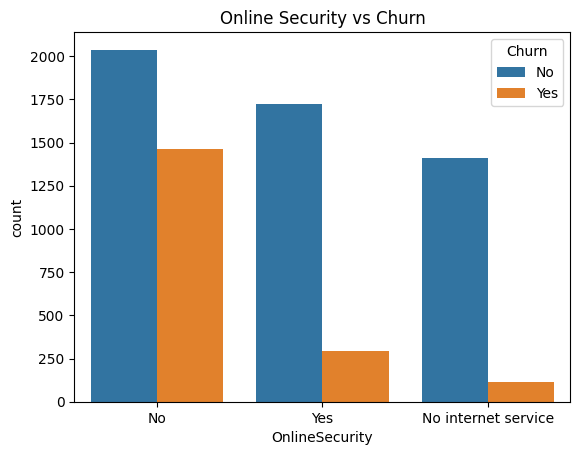

In [36]:
#Service Adoption 
sns.countplot(data=df, x='OnlineSecurity', hue='Churn')
plt.title("Online Security vs Churn")
plt.savefig(r"..\outputs\figures\OnlineSecuirty_vs_Churn.png",dpi=300,bbox_inches="tight")
plt.show()
plt.close()
#The Customer With Value Added Service Churn less 


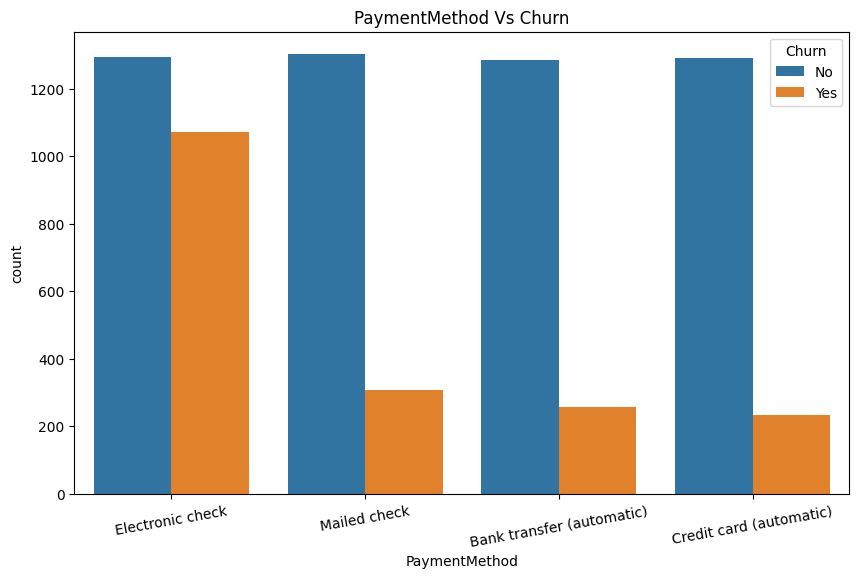

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x = 'PaymentMethod', hue = 'Churn')
plt.title("PaymentMethod Vs Churn")
plt.savefig(r"..\outputs\figures\PayementMethod_vs_Churn.png",dpi=300,bbox_inches="tight")
plt.xticks(rotation = 10)
plt.show()
plt.close()

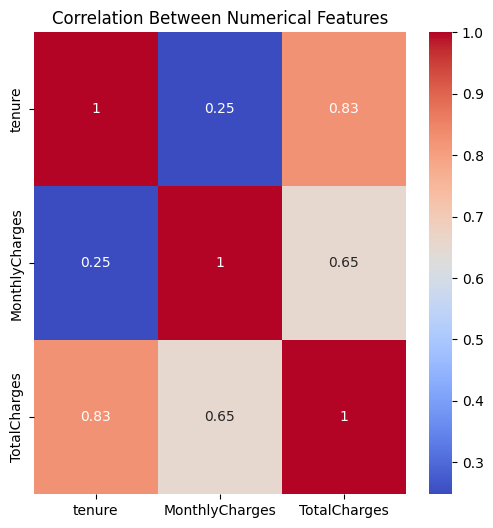

'\nA strong positive correlation is observed between tenure and TotalCharges.\nThis indicates that customers with longer tenure naturally accumulate higher total charges over time.\nThis relationship reflects expected business behavior in a subscription-based telecom model and is not a data quality concern.\n'

In [39]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
corr = df[numeric_cols].corr()

plt.figure(figsize=(6,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Numerical Features")
plt.savefig(r"..\outputs\figures\Heatmap.png",dpi=300,bbox_inches="tight")
plt.show()
plt.close()

"""
A strong positive correlation is observed between tenure and TotalCharges.
This indicates that customers with longer tenure naturally accumulate higher total charges over time.
This relationship reflects expected business behavior in a subscription-based telecom model and is not a data quality concern.
"""